# IRONHACK mini project


### The challenge

* Perform an end-to-end analysis putting into practice what you have learned so far. You will apply statistical or machine learning techniques and present your results to the class.


### The goal

* We want to act as a consultant for a NBA team who wants to know how important are the Draft picks for a franchise. We will be able to say how important are their picks and how good is going to be a player depending on their pick of the Draft.
* Is it worthy to have one of the top selections?

In [1]:
# Import libraries and dependencies

import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None) # We want to see all the columns

In [2]:
# Import an original database

nba = pd.read_csv("../Data/draft-data-20-years.csv")
nba

Unnamed: 0  Rk  Pk   Tm                Player        College   Yrs  \
0              1   1   1  BRK       Derrick Coleman       Syracuse  15.0   
1              2   2   2  OKC           Gary Payton   Oregon State  17.0   
2              3   3   3  DEN    Mahmoud Abdul-Rauf            LSU   9.0   
3              4   4   4  ORL          Dennis Scott   Georgia Tech  10.0   
4              5   5   5  CHA          Kendall Gill       Illinois  15.0   
...          ...  ..  ..  ...                   ...            ...   ...   
1863        1864  56  56  CHA         Scottie Lewis        Florida   1.0   
1864        1865  57  57  CHA       Balša Koprivica  Florida State   NaN   
1865        1866  58  58  NYK          Jericho Sims          Texas   1.0   
1866        1867  59  59  BRK          RaiQuan Gray  Florida State   NaN   
1867        1868  60  60  IND  Georgios Kalaitzakis            NaN   1.0   

           G    TOTMP   TOTPTS  TOTTRB  TOTAST    FG%    3P%    FT%     WS  \
0      781.0  25903.0  12884.0  7232.0  1985.0  0.447  0.295  0.769   64.3   
1     1335.0  47117.0  21813.0  5269.0  8966.0  0.466  0.317  0.729  145.5   
2      586.0  15628.0   8553.0  1087.0  2079.0  0.442  0.354  0.905   25.2   
3      629.0  17983.0   8094.0  1774.0  1296.0  0.417  0.397  0.793   33.4   
4      966.0  29481.0  12914.0  4002.0  2945.0  0.434  0.300  0.754   47.8   
...      ...      ...      ...     ...     ...    ...    ...    ...    ...   
1863     2.0      7.0      1.0     0.0     1.0    NaN    NaN  0.500    0.0   
1864     NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN    NaN   
1865    18.0    117.0     19.0    27.0     1.0  0.727    NaN  0.750    0.4   
1866     NaN      NaN      NaN     NaN     NaN    NaN    NaN    NaN    NaN   
1867     9.0     48.0     16.0     8.0     0.0  0.455  0.500  0.444    0.0   

      WS/48  BPM  VORP  DraftYr   MPG   PPG  RPG  APG  \
0     0.119  1.4  22.3     1990  33.2  16.5  9.3  2.5   
1     0.148  3.3  62.5     1990  35.3  16.3  3.9  6.7   
2     0.077 -0.8   4.5     1990  26.7  14.6  1.9  3.5   
3     0.089  0.2   9.9     1990  28.6  12.9  2.8  2.1   
4     0.078  0.1  15.8     1990  30.5  13.4  4.1  3.0   
...     ...  ...   ...      ...   ...   ...  ...  ...   
1863  0.164  6.1   0.0     2021   3.5   0.5  0.0  0.5   
1864    NaN  NaN   NaN     2021   NaN   NaN  NaN  NaN   
1865  0.145 -0.6   0.0     2021   6.5   1.1  1.5  0.1   
1866    NaN  NaN   NaN     2021   NaN   NaN  NaN  NaN   
1867 -0.005 -8.0  -0.1     2021   5.3   1.8  0.9  0.0   

                                              playerurl  DraftYear  
0     https://www.sports-reference.com/cbb/players/d...       1990  
1     https://www.sports-reference.com/cbb/players/g...       1990  
2     https://www.sports-reference.com/cbb/players/m...       1990  
3     https://www.sports-reference.com/cbb/players/d...       1990  
4     https://www.sports-reference.com/cbb/players/k...       1990  
...                                                 ...        ...  
1863  https://www.sports-reference.com/cbb/players/s...       2021  
1864  https://www.sports-reference.com/cbb/players/b...       2021  
1865  https://www.sports-reference.com/cbb/players/j...       2021  
1866  https://www.sports-reference.com/cbb/players/r...       2021  
1867                                                NaN       2021  

[1868 rows x 26 columns]

In [3]:
nba.shape

(1868, 26)

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1868 non-null   int64  
 1   Rk          1868 non-null   int64  
 2   Pk          1868 non-null   int64  
 3   Tm          1868 non-null   object 
 4   Player      1868 non-null   object 
 5   College     1533 non-null   object 
 6   Yrs         1621 non-null   float64
 7   G           1621 non-null   float64
 8   TOTMP       1621 non-null   float64
 9   TOTPTS      1621 non-null   float64
 10  TOTTRB      1621 non-null   float64
 11  TOTAST      1621 non-null   float64
 12  FG%         1616 non-null   float64
 13  3P%         1500 non-null   float64
 14  FT%         1584 non-null   float64
 15  WS          1621 non-null   float64
 16  WS/48       1620 non-null   float64
 17  BPM         1620 non-null   float64
 18  VORP        1621 non-null   float64
 19  DraftYr     1868 non-null  

In [5]:
nba.describe(include="all")

Unnamed: 0           Rk           Pk    Tm          Player   College  \
count   1868.00000  1868.000000  1868.000000  1868            1868      1533   
unique         NaN          NaN          NaN    30            1863       229   
top            NaN          NaN          NaN   PHI  Justin Jackson  Kentucky   
freq           NaN          NaN          NaN    87               2        58   
mean     934.50000    29.758030    29.758030   NaN             NaN       NaN   
std      539.38947    16.945052    16.945052   NaN             NaN       NaN   
min        1.00000     1.000000     1.000000   NaN             NaN       NaN   
25%      467.75000    15.000000    15.000000   NaN             NaN       NaN   
50%      934.50000    30.000000    30.000000   NaN             NaN       NaN   
75%     1401.25000    44.000000    44.000000   NaN             NaN       NaN   
max     1868.00000    60.000000    60.000000   NaN             NaN       NaN   

                Yrs            G         TOTMP        TOTPTS        TOTTRB  \
count   1621.000000  1621.000000   1621.000000   1621.000000   1621.000000   
unique          NaN          NaN           NaN           NaN           NaN   
top             NaN          NaN           NaN           NaN           NaN   
freq            NaN          NaN           NaN           NaN           NaN   
mean       6.305367   342.477483   8250.098705   3511.962369   1477.016656   
std        4.640924   322.947374   9765.177283   4788.948725   1993.300685   
min        1.000000     1.000000      0.000000      0.000000      0.000000   
25%        2.000000    69.000000    792.000000    253.000000    123.000000   
50%        5.000000   230.000000   4000.000000   1516.000000    635.000000   
75%       10.000000   575.000000  13026.000000   5081.000000   2093.000000   
max       22.000000  1541.000000  51563.000000  36559.000000  15091.000000   

              TOTAST          FG%          3P%          FT%           WS  \
count    1621.000000  1616.000000  1500.000000  1584.000000  1621.000000   
unique           NaN          NaN          NaN          NaN          NaN   
top              NaN          NaN          NaN          NaN          NaN   
freq             NaN          NaN          NaN          NaN          NaN   
mean      754.235657     0.435562     0.273049     0.716653    17.576373   
std      1266.295204     0.084803     0.128208     0.119500    27.862566   
min         0.000000     0.000000     0.000000     0.000000    -1.900000   
25%        43.000000     0.403000     0.221750     0.658000     0.400000   
50%       250.000000     0.435000     0.317000     0.737000     4.900000   
75%       896.000000     0.473000     0.356000     0.796000    23.800000   
max     12091.000000     1.000000     1.000000     1.000000   248.300000   

              WS/48          BPM         VORP      DraftYr          MPG  \
count   1620.000000  1620.000000  1621.000000  1868.000000  1621.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.061087    -2.333457     4.318816  2005.789079    18.040592   
std        0.096265     4.165910    11.404481     9.170436     8.730546   
min       -1.264000   -52.000000    -8.500000  1990.000000     0.000000   
25%        0.030000    -3.900000    -0.400000  1998.000000    10.800000   
50%        0.069000    -2.000000     0.000000  2006.000000    17.600000   
75%        0.103000    -0.300000     4.300000  2014.000000    24.900000   
max        1.442000    51.100000   141.400000  2021.000000    41.100000   

                PPG          RPG          APG  \
count   1621.000000  1621.000000  1621.000000   
unique          NaN          NaN          NaN   
top             NaN          NaN          NaN   
freq            NaN          NaN          NaN   
mean       7.218692     3.186243     1.531215   
st

#### CONCLUSION:
>After observing the database and the rest of descriptive tables, we see that the column 'Unnamed: 0' is an "index" column and there are 2 couples of columns that have exactly the same values ('Rk' and 'Pk') and ('DraftYr' and 'DraftYear'). Moreover, the draft overall picks are sorted in ascending order whereas the rest of numerical columns are sorted in descending order.

>CLARIFICATION: We are not going to drop the repeated column 'Rk' because we will use it as a groupby column.

>We also observe that there are some rows that they have almost the entire row full of NaN. Those rows are from players who never played NBA even they were selected in the Draft. As our study is going to be for athletes who actually played the game, we decided to drop them all off.

>On the describe table we see that there is at least one name repeated, we are going to check

In [6]:
# Dropping unnecessary and repeated columns

nba = nba.drop(['Unnamed: 0', 'Tm', 'College', 'DraftYr', 'playerurl'], axis =1) # Dropping columns

In [7]:
nba.head(5) # Checking

Rk  Pk              Player   Yrs       G    TOTMP   TOTPTS  TOTTRB  TOTAST  \
0   1   1     Derrick Coleman  15.0   781.0  25903.0  12884.0  7232.0  1985.0   
1   2   2         Gary Payton  17.0  1335.0  47117.0  21813.0  5269.0  8966.0   
2   3   3  Mahmoud Abdul-Rauf   9.0   586.0  15628.0   8553.0  1087.0  2079.0   
3   4   4        Dennis Scott  10.0   629.0  17983.0   8094.0  1774.0  1296.0   
4   5   5        Kendall Gill  15.0   966.0  29481.0  12914.0  4002.0  2945.0   

     FG%    3P%    FT%     WS  WS/48  BPM  VORP   MPG   PPG  RPG  APG  \
0  0.447  0.295  0.769   64.3  0.119  1.4  22.3  33.2  16.5  9.3  2.5   
1  0.466  0.317  0.729  145.5  0.148  3.3  62.5  35.3  16.3  3.9  6.7   
2  0.442  0.354  0.905   25.2  0.077 -0.8   4.5  26.7  14.6  1.9  3.5   
3  0.417  0.397  0.793   33.4  0.089  0.2   9.9  28.6  12.9  2.8  2.1   
4  0.434  0.300  0.754   47.8  0.078  0.1  15.8  30.5  13.4  4.1  3.0   

   DraftYear  
0       1990  
1       1990  
2       1990  
3       1990  
4       1990

In [8]:
# Checking the duplicity of the player names

nba.Player.value_counts()

Justin Jackson          2
Marcus Williams         2
Marcus Thornton         2
Corey Brewer            2
Dee Brown               2
                       ..
Kwame Brown             1
Pete Mickeal            1
Scoonie Penn            1
Jaquay Walls            1
Georgios Kalaitzakis    1
Name: Player, Length: 1863, dtype: int64

In [9]:
# Dropping full duplicated rows
# If we did only with player names, we could drop players who have the same name but there are not the same person

nba.drop_duplicates(ignore_index=True)

Rk  Pk                Player   Yrs       G    TOTMP   TOTPTS  TOTTRB  \
0      1   1       Derrick Coleman  15.0   781.0  25903.0  12884.0  7232.0   
1      2   2           Gary Payton  17.0  1335.0  47117.0  21813.0  5269.0   
2      3   3    Mahmoud Abdul-Rauf   9.0   586.0  15628.0   8553.0  1087.0   
3      4   4          Dennis Scott  10.0   629.0  17983.0   8094.0  1774.0   
4      5   5          Kendall Gill  15.0   966.0  29481.0  12914.0  4002.0   
...   ..  ..                   ...   ...     ...      ...      ...     ...   
1863  56  56         Scottie Lewis   1.0     2.0      7.0      1.0     0.0   
1864  57  57       Balša Koprivica   NaN     NaN      NaN      NaN     NaN   
1865  58  58          Jericho Sims   1.0    18.0    117.0     19.0    27.0   
1866  59  59          RaiQuan Gray   NaN     NaN      NaN      NaN     NaN   
1867  60  60  Georgios Kalaitzakis   1.0     9.0     48.0     16.0     8.0   

      TOTAST    FG%    3P%    FT%     WS  WS/48  BPM  VORP   MPG   PPG  RPG  \
0     1985.0  0.447  0.295  0.769   64.3  0.119  1.4  22.3  33.2  16.5  9.3   
1     8966.0  0.466  0.317  0.729  145.5  0.148  3.3  62.5  35.3  16.3  3.9   
2     2079.0  0.442  0.354  0.905   25.2  0.077 -0.8   4.5  26.7  14.6  1.9   
3     1296.0  0.417  0.397  0.793   33.4  0.089  0.2   9.9  28.6  12.9  2.8   
4     2945.0  0.434  0.300  0.754   47.8  0.078  0.1  15.8  30.5  13.4  4.1   
...      ...    ...    ...    ...    ...    ...  ...   ...   ...   ...  ...   
1863     1.0    NaN    NaN  0.500    0.0  0.164  6.1   0.0   3.5   0.5  0.0   
1864     NaN    NaN    NaN    NaN    NaN    NaN  NaN   NaN   NaN   NaN  NaN   
1865     1.0  0.727    NaN  0.750    0.4  0.145 -0.6   0.0   6.5   1.1  1.5   
1866     NaN    NaN    NaN    NaN    NaN    NaN  NaN   NaN   NaN   NaN  NaN   
1867     0.0  0.455  0.500  0.444    0.0 -0.005 -8.0  -0.1   5.3   1.8  0.9   

      APG  DraftYear  
0     2.5       1990  
1     6.7       1990  
2     3.5       1990  
3     2.1       1990  
4     3.0       1990  
...   ...        ...  
1863  0.5       2021  
1864  NaN       2021  
1865  0.1       2021  
1866  NaN       2021  
1867  0.0       2021  

[1868 rows x 21 columns]

>We see the same number of rows than the original database after dropping so there are not duplicated players

In [10]:
# Checking the NaN

nba.isna().sum()

Rk             0
Pk             0
Player         0
Yrs          247
G            247
TOTMP        247
TOTPTS       247
TOTTRB       247
TOTAST       247
FG%          252
3P%          368
FT%          284
WS           247
WS/48        248
BPM          248
VORP         247
MPG          247
PPG          247
RPG          247
APG          247
DraftYear      0
dtype: int64

In [11]:
nba = nba.dropna().reset_index(drop=True) # Dropping them
nba.isna().sum()

Rk           0
Pk           0
Player       0
Yrs          0
G            0
TOTMP        0
TOTPTS       0
TOTTRB       0
TOTAST       0
FG%          0
3P%          0
FT%          0
WS           0
WS/48        0
BPM          0
VORP         0
MPG          0
PPG          0
RPG          0
APG          0
DraftYear    0
dtype: int64

In [12]:
# Renaming the headers

nba.rename(columns={'Rk':'groupby', 'Pk':'overall_pick', 'Yrs':'years_played', 'G':'total_games_played', 'TOTMP':'total_minutes_played', 'TOTPTS':'total_points_scored', 'TOTTRB':'total_rebounds', 'TOTAST':'total_assists', 'FG%':'field_goal_percentage', '3P%':'3_point_percentage',
       'FT%':'free_throw_percentage', 'WS':'win_shares', 'WS/48':'win_shares_48_minutes', 'BPM':'box_plus_minus', 'VORP':'value_over_replacement_player', 'MPG':'minutes_per_game', 'PPG':'points_per_game', 'RPG':'rebounds_per_game', 'APG':'assists_per_game',
       'DraftYear':'draft_year'},inplace=True)
nba.head(5)

groupby  overall_pick              Player  years_played  \
0        1             1     Derrick Coleman          15.0   
1        2             2         Gary Payton          17.0   
2        3             3  Mahmoud Abdul-Rauf           9.0   
3        4             4        Dennis Scott          10.0   
4        5             5        Kendall Gill          15.0   

   total_games_played  total_minutes_played  total_points_scored  \
0               781.0               25903.0              12884.0   
1              1335.0               47117.0              21813.0   
2               586.0               15628.0               8553.0   
3               629.0               17983.0               8094.0   
4               966.0               29481.0              12914.0   

   total_rebounds  total_assists  field_goal_percentage  3_point_percentage  \
0          7232.0         1985.0                  0.447               0.295   
1          5269.0         8966.0                  0.466               0.317   
2          1087.0         2079.0                  0.442               0.354   
3          1774.0         1296.0                  0.417               0.397   
4          4002.0         2945.0                  0.434               0.300   

   free_throw_percentage  win_shares  win_shares_48_minutes  box_plus_minus  \
0                  0.769        64.3                  0.119             1.4   
1                  0.729       145.5                  0.148             3.3   
2                  0.905        25.2                  0.077            -0.8   
3                  0.793        33.4                  0.089             0.2   
4                  0.754        47.8                  0.078             0.1   

   value_over_replacement_player  minutes_per_game  points_per_game  \
0                           22.3              33.2             16.5   
1                           62.5              35.3             16.3   
2                            4.5              26.7             14.6   
3                            9.9              28.6             12.9   
4                           15.8              30.5             13.4   

   rebounds_per_game  assists_per_game  draft_year  
0                9.3               2.5        1990  
1                3.9               6.7        1990  
2                1.9               3.5        1990  
3                2.8               2.1        1990  
4                4.1               3.0        1990

In [13]:
# We are going to create a new variable as a groupby for all the overall picks with the mean of each other features
# We also are going to drop the 'draft_year' column because it gives us nothing

nba_groupby = nba.groupby(by= ["groupby"], axis= 0).mean().round(2).drop(['draft_year'], axis =1)
nba_groupby

overall_pick  years_played  total_games_played  total_minutes_played  \
groupby                                                                         
1                 1.0         10.80              651.13              21603.90   
2                 2.0         10.13              635.29              19053.71   
3                 3.0         10.31              643.72              19785.59   
4                 4.0         10.38              640.97              19092.06   
5                 5.0         10.66              671.41              19341.41   
6                 6.0          7.31              431.28              11547.19   
7                 7.0          9.47              584.47              15990.84   
8                 8.0          8.50              503.31              12721.47   
9                 9.0          9.38              569.47              15488.62   
10               10.0          9.81              592.00              16094.23   
11               11.0          7.67              431.80              10428.13   
12               12.0          7.62              450.03               9770.31   
13               13.0          8.31              500.00              12856.16   
14               14.0          6.77              373.27               8705.03   
15               15.0          7.70              437.20              10364.30   
16               16.0          7.00              386.87               8496.52   
17               17.0          7.12              392.97               9507.66   
18               18.0          7.22              398.00               8775.31   
19               19.0          6.84              374.69               8547.41   
20               20.0          6.93              365.55               7765.62   
21               21.0          7.60              434.37              10549.77   
22               22.0          5.77              305.77               6730.70   
23               23.0          7.70              447.07              10056.07   
24               24.0          7.22              412.09              10304.44   
25               25.0          6.03              300.58               6422.16   
26               26.0          6.24              337.14               7391.86   
27               27.0          6.86              384.97               8218.38   
28               28.0          6.10              328.00               6593.48   
29               29.0          6.29              312.12               6558.75   
30               30.0          5.68              305.07               6735.61   
31               31.0          4.93              242.07               5038.00   
32               32.0          4.59              212.59               4012.37   
33               33.0          4.67              220.56               4002.78   
34               34.0          4.65              227.15               4414.50   
35               35.0          5.92              305.83               6680.08   
36               36.0          4.10              188.95               3383.29   
37               37.0          5.63              280.56               5611.70   
38               38.0          4.96              229.12               4605.00   
39               39.0          5.62              252.90               5010.05   
40               40.0          5.61              303.52               6825.52   
41               41.0          4.77              228.73               5042.95   
42               42.0          5.50              274.05               6186.00   
43               43.0          5.57              277.00               6291.39   
44               44.0          5.44              231.88               3688.31   
45               45.0          5.57              302.39               6912.43   
46               46.0          4.57              228.52               4907.26   
47               47.0          6.35              307.24               6711.59   
48               48.0          3.81     

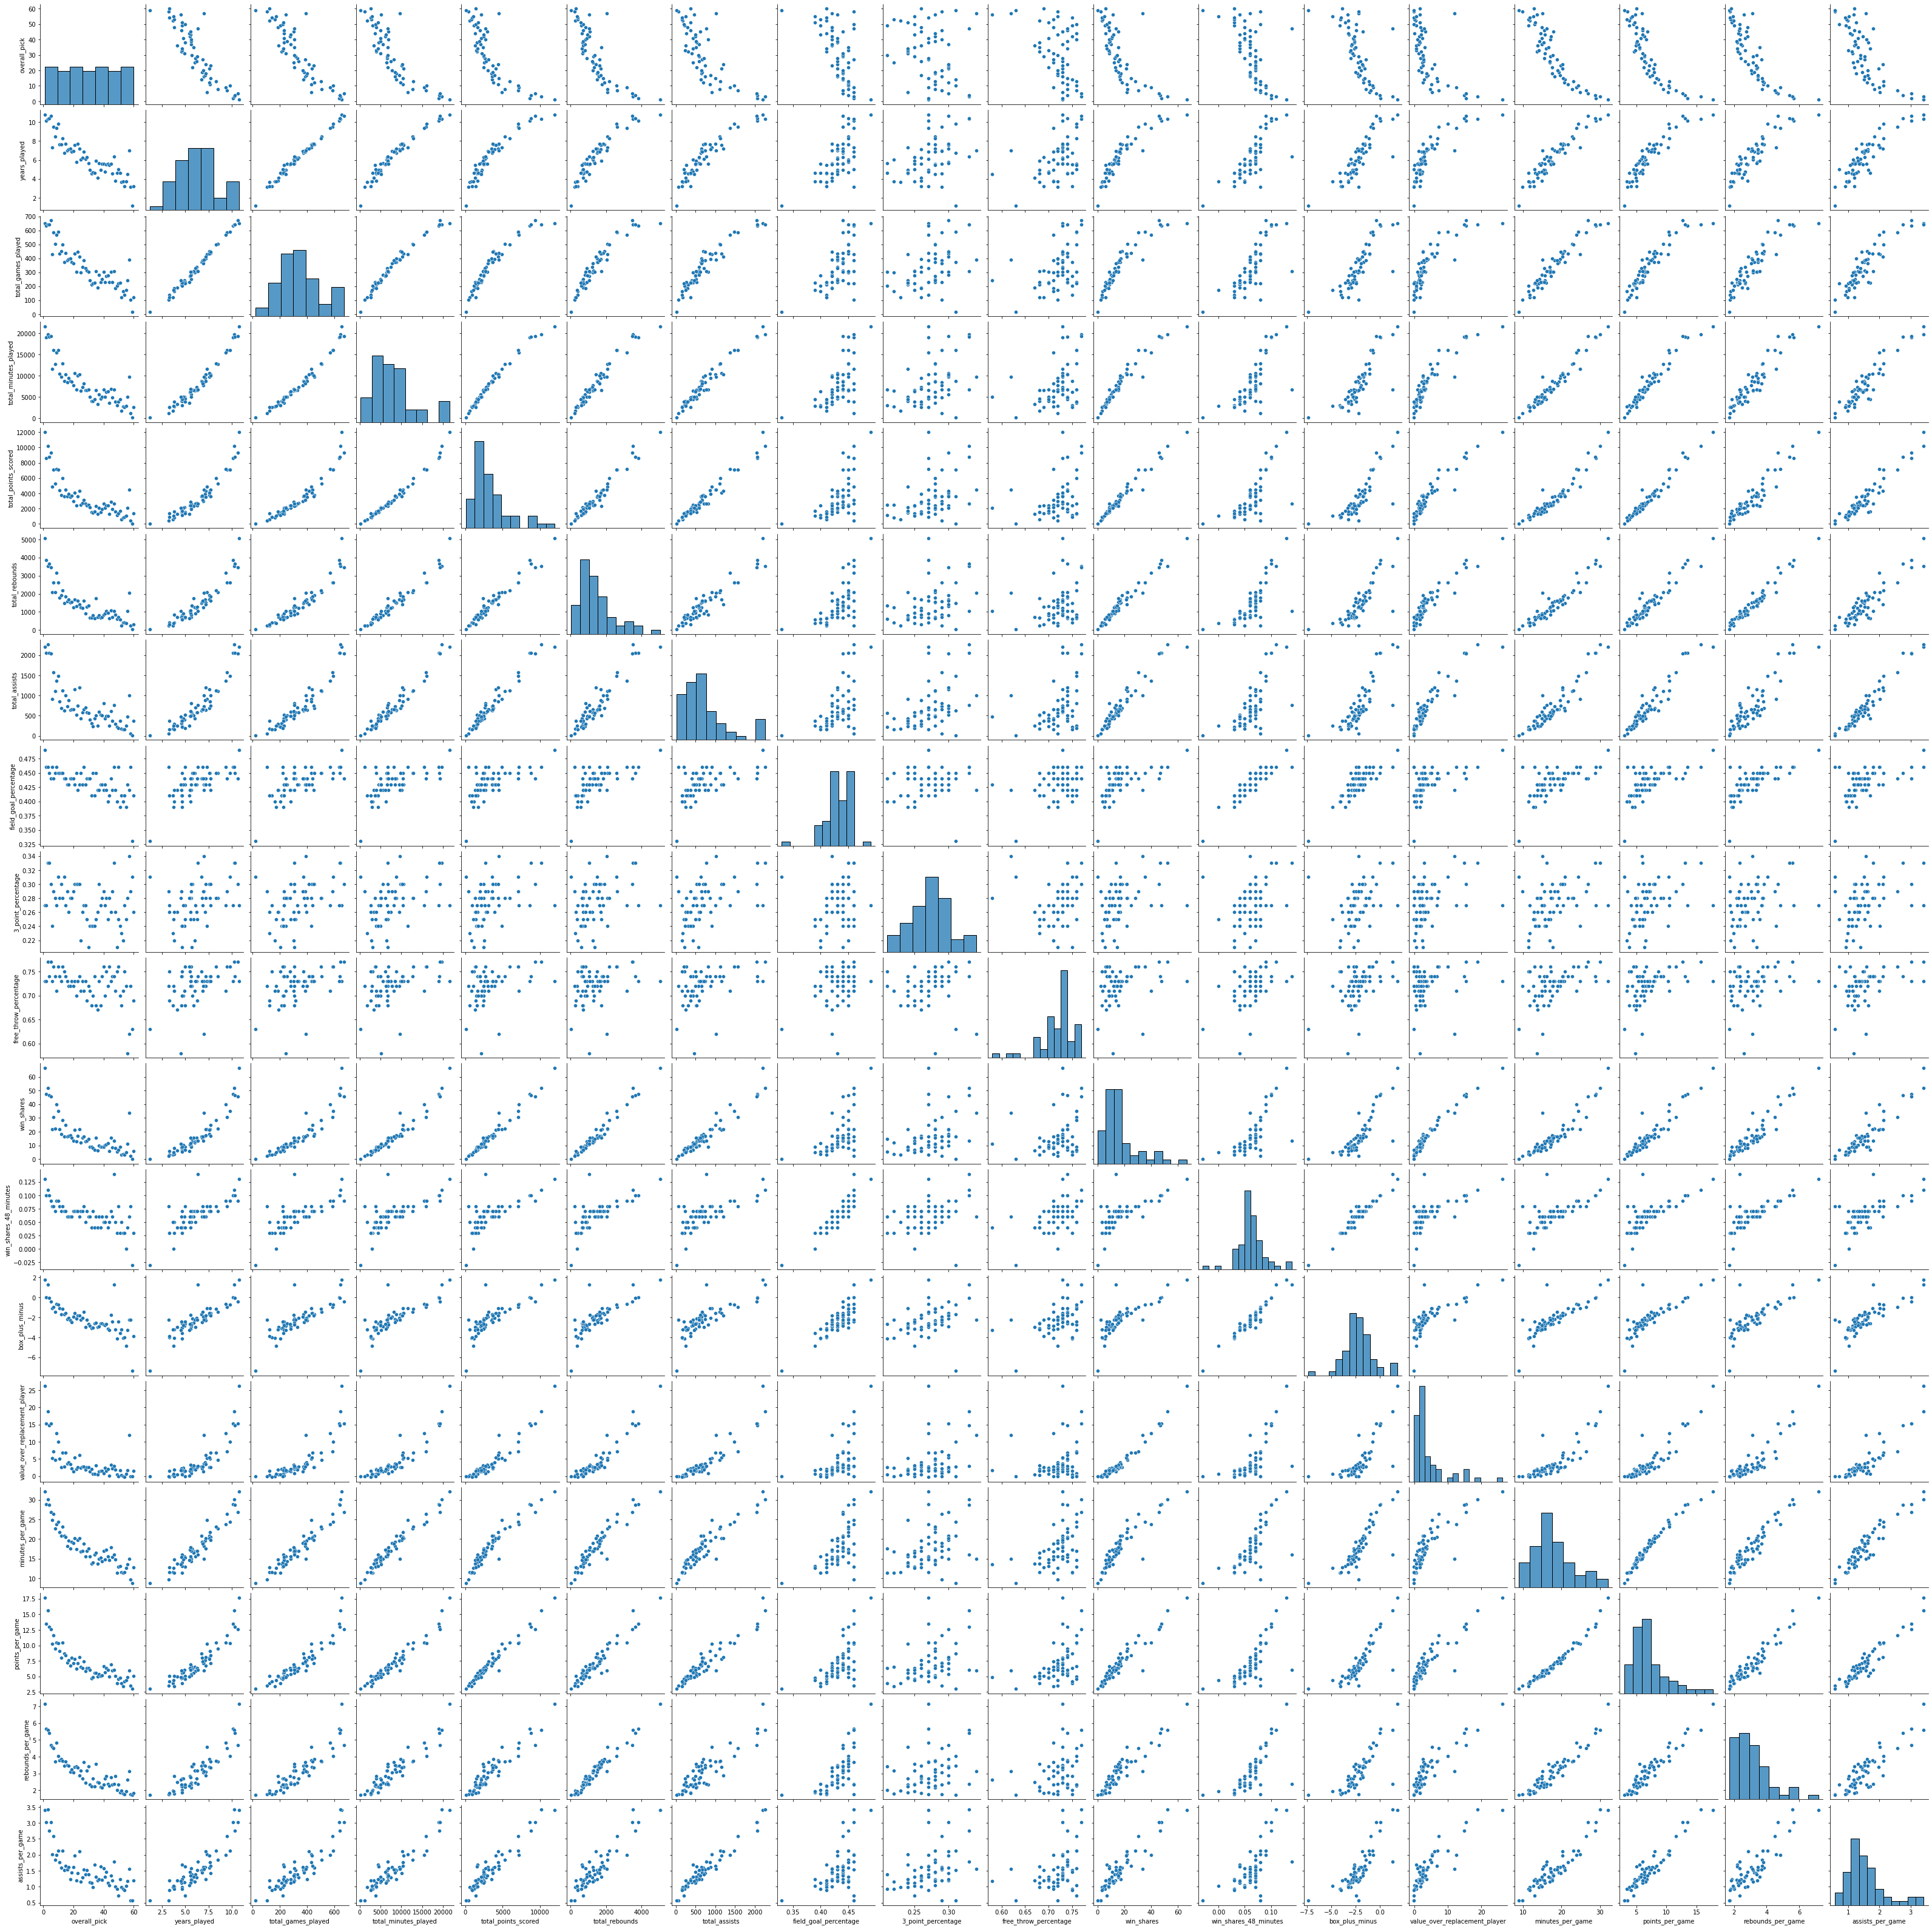

In [14]:
sns.pairplot(nba_groupby)

In [15]:
nba_groupby.corr("spearman").style.background_gradient(cmap='coolwarm')

#### CONCLUSION

* By only a simple sight of both the pairplot and the heatmap, we see a huge correlation between the overall pick and the rest of the features. This correlation is negative as the overall pick column is in descending order. So we can conclude already that there is a close relationship between the draft overall pick and the performance of a player in their career.
* The rest of the features are also correlated because as more games more points scored and so on.
* Only the percentadge variables show no correlation. They tell us that it does not mean that as more games or higher pick better percentadge, it is just a bit higher but not so relevant.

In [16]:
# Making a new variable dropping the huge correlated columns in order to avoid multicorrelation

nba_groupby_new = nba_groupby.drop(['total_games_played', 'total_minutes_played', 'total_rebounds', 'total_assists', 
                                    'field_goal_percentage', '3_point_percentage', 'free_throw_percentage', 
                                    'win_shares_48_minutes', 'minutes_per_game', 'rebounds_per_game', 'assists_per_game'], 
                                   axis =1)

In [17]:
nba_groupby_new.corr("spearman").style.background_gradient(cmap='coolwarm')

### Applying the model

In [18]:
# Split between explanative features and the target variable

features_list = ['years_played', 'total_points_scored', 'win_shares', 'box_plus_minus', 
                 'value_over_replacement_player', 'points_per_game']

X = nba_groupby_new.loc[:, features_list]
y = nba_groupby_new.loc[:, "overall_pick"]

In [19]:
# Division of the dataset into trains and a test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [20]:
# Checking if every done value matches

print("Number of rows of X_train = {}".format(len(X_train)))
print("Number of rows of X_test = {}".format(len(X_test)))
print("Number of rows of y_train= {}".format(len(y_train)))
print("Number of rows of y_test = {}".format(len(y_test)))
print("Percentage of train values = {}".format(round(len(X_train)/len(X), 4) * 100),"%")

Number of rows of X_train = 48
Number of rows of X_test = 12
Number of rows of y_train= 48
Number of rows of y_test = 12
Percentage of train values = 80.0 %


In [21]:
# Applying the scaler to the train and test set

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [22]:
# Creating the model with sklearn

from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # Instanciation of the model
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
# The coefficients of the regressor

regressor.coef_

array([-20.08654222,  30.24016991,  -4.05195016,   3.34482169,
         3.98519467, -27.83950008])

In [24]:
# Verifying overfitting

print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score of Train : 0.8784001908105282
 Score of Test : 0.89603086933909


>The results are close and the model is really good

In [25]:
predictions = regressor.predict(X_train)

mse = mean_squared_error(y_train, predictions, squared=True)
rmse = mean_squared_error(y_train, predictions, squared=False)
mae = mean_absolute_error(y_train, predictions)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

MSE: 35.312025145056026
RMSE: 5.94239220727276
MAE: 4.850749673905023


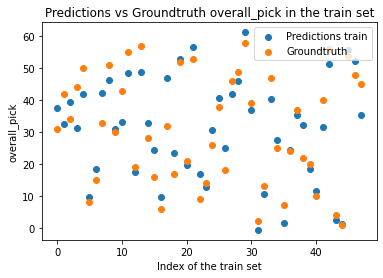

In [26]:
# Visualization of predictions on train set vs real values for y (groundtruth)

x = predictions
y = y_train
t = np.arange(0, x.size)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

plt.scatter(t,x) 
plt.scatter(t,y)

plt.title("Predictions vs Groundtruth overall_pick in the train set") 

plt.xlabel("Index of the train set") 
plt.ylabel("overall_pick") 
 
plt.legend(["Predictions train", "Groundtruth"], loc ="upper right")

plt.show()

### Visualization

In [27]:
nba1 = nba[nba["total_games_played"] > 250]

fig = px.scatter_3d(nba1, x = "draft_year", y = "overall_pick", z = "total_points_scored", 
                    opacity = 0.75, hover_data = ["Player"],
                    color = "overall_pick", color_continuous_scale = "haline_r")

print("")
print("")
print("")
print("TOTAL POINTS SCORED BY OVERALL PICK AND YEAR")
print("")
print("")
print("")



fig.update_traces(marker = dict(size = 3.5))
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()




TOTAL POINTS SCORED BY OVERALL PICK AND YEAR





* We want to know how important is a player. What happens when he is out of the court?

In [28]:
fig = px.scatter_3d(nba1, x = "draft_year", y = "overall_pick", z = "value_over_replacement_player", 
                    opacity = 0.75, hover_data = ["Player"],
                    color = "overall_pick", color_continuous_scale = "Plotly3_r")

print("")
print("")
print("")
print("VALUE OVER REPLACEMENT PLAYER BY OVERALL PICK AND YEAR")
print("")
print("")
print("")



fig.update_traces(marker = dict(size = 3.5)) # scaling down the markers
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 12))
fig.show()




VALUE OVER REPLACEMENT PLAYER BY OVERALL PICK AND YEAR





In [29]:
for y in ["years_played"]:
    
    fig = px.bar(nba_groupby, x = "overall_pick", y = y, title = f"Career longevity based on draft overall pick",
    color = "overall_pick", color_continuous_scale = "Thermal_r",)

    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 18))
    fig.show()

# Conclusion

>Is it worthwhile to have a selection among the first fifteen positions?

>Our research shows that:

* Players selected from top positions on Draft perform better on Points scored and Team impact along their professional career at the NBA

* Career longevity shows a relationship with Draft Pick. In our opinión this is an indirect measure of Player´s Quality as we asume that NBA is a Darwinian environment, highly competitive were long careers are only available for high performing players

### Based on the analysis of this data we conclude that picking players from the top positions on the Draft has a positive impact for the Teams